In [ ]:
#Esta celda importa todas las librerias necesarias
!pip install ordpy
import numpy as np
import ordpy
from ordpy import renyi_entropy
from ordpy import permutation_entropy
from ordpy import renyi_complexity_entropy
from ordpy import minimum_complexity_entropy
from ordpy import maximum_complexity_entropy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import string
import glob
import warnings
import math
from scipy.fft import fft, ifft
from scipy.io import savemat
import matplotlib.colors as mcolors


In [ ]:
def maximum_renyi_complexity_entropy(dx=3, dy=1, m=1, q=1.4):
    """
    Generates data corresponding to values of normalized renyi permutation
    entropy and statistical complexity which delimit the upper boundary in the
    complexity-entropy renyi causality plane\\ [#rosso_curvas]_:sup:`,`\\ [*]_.

    Parameters
    ----------
    dx : int
         Embedding dimension (horizontal axis) (default: 3).
    dy : int
         Embedding dimension (vertical axis); must be 1 for time series
         (default: 1).
    m : int
        The length of the returned array containing values of permutation entropy
        and statistical complexity is given by
        :math:`[(d_x \\times d_y)!-1] \\times m`.
    q:  float
        Renyi parameter (default: 1.4)

    Returns
    -------
     : array
       Values of normalized permutation renyi entropy and statistical complexity
       belonging to the upper limiting curve of the renyi complexity-entropy causality
       plane.

    Notes
    -----
    .. [*] This function was adapted from Ordpy.

    """
    if q==1.0:
       return maximum_complexity_entropy(dx,dy,m)
    else:
       N              = math.factorial(dx*dy)
       hlist_, clist_ = np.zeros(shape=(N-1,m)), np.zeros(shape=(N-1,m))
       for i in range(N-1):
           p             = np.zeros(shape=N)
           uniform_dist  = np.full(N, 1/N)
           prob_params   = np.linspace(0, 1/N, num=m)
           for k in range(len(prob_params)):
               p[0] = prob_params[k]
               for j in range(1,N-i):
                   p[j] = (1-prob_params[k])/(N-i-1)
               h = renyi_entropy(p,q,dx, dy, probs=True)
               p_plus_u_over_2      = (uniform_dist + p)/2
               s_of_p_plus_u_over_2 = renyi_entropy(p_plus_u_over_2,q,dx, dy, probs=True)
               p_non_zero    = p[p!=0]
               p_plus_u_over_2_no      = (1/N + p_non_zero)/2
               t_1=np.log(sum((p**q)*p_plus_u_over_2**(1-q)))
               t_2=np.log(sum((uniform_dist**q)*p_plus_u_over_2**(1-q)))
               js_div_max = (0.5/(q-1))*np.log((((N+1)**(1-q)+N-1)/N)*((N+1)/(4*N))**(1-q))
               js_div     = (0.5/(q-1))*(t_1+t_2)
               hlist_[i, k] = h
               clist_[i, k] = h*js_div/js_div_max

       #flatenning the arrays and ordering the pairs of values.
       hlist_ = hlist_.flatten()
       clist_ = clist_.flatten()
       args   = np.argsort(hlist_)

    return np.asarray((hlist_[args], clist_[args])).T

In [ ]:
def minimum_renyi_complexity_entropy(dx=3, dy=1, size=100,q=1.4):
    """
    Generates data corresponding to values of normalized renyi permutation
    entropy and statistical complexity which delimit the lower boundary in the
    complexity-entropy renyi causality plane\\ [#rosso_curvas]_:sup:`,`\\ [*]_.

    Parameters
    ----------
    dx : int
         Embedding dimension (horizontal axis) (default: 3).
    dy : int
         Embedding dimension (vertical axis); must be 1 for time series
         (default: 1).
    size : int
           The length of the array returned containing pairs of values of
           permutation entropy and statistical complexity.
    q:  float
        Renyi parameter (default: 1.4)

    Returns
    -------
     : array
       Values of normalized permutation renyi entropy and statistical complexity
       belonging to the lower limiting curve of the renyi complexity-entropy
       causality plane.

    Notes
    -----
    .. [*] This function was adapted from Ordpy.

    """
    if q==1.0:
       return minimum_complexity_entropy(dx,dy,size)
    else:
       size        += 1
       N            = math.factorial(dx*dy)
       prob_params  = np.linspace(1/N, 1, num=size-1)
       uniform_dist = np.full(N, 1/N)
       hc_ = []
       for i in range(size-1):
           probabilities    = np.full(shape=N, fill_value=(1-prob_params[i])/(N-1))
           probabilities[0] = prob_params[i]
           h = renyi_entropy(probabilities,q,dx, dy, probs=True)
           p_plus_u_over_2      = (uniform_dist + probabilities)/2
           s_of_p_plus_u_over_2 = renyi_entropy(p_plus_u_over_2,q,dx, dy, probs=True)
           # probabilities = probabilities[probabilities!=0]

           t_1=np.log(sum((probabilities**q)*p_plus_u_over_2**(1-q)))
           t_2=np.log(sum((uniform_dist**q)*p_plus_u_over_2**(1-q)))

           js_div_max = (0.5/(q-1))*np.log((((N+1)**(1-q)+N-1)/N)*((N+1)/(4*N))**(1-q))
           js_div     = (0.5/(q-1))*(t_1+t_2)


           hc_.append([h, h*js_div/js_div_max])

       return np.flip(hc_, axis=0)


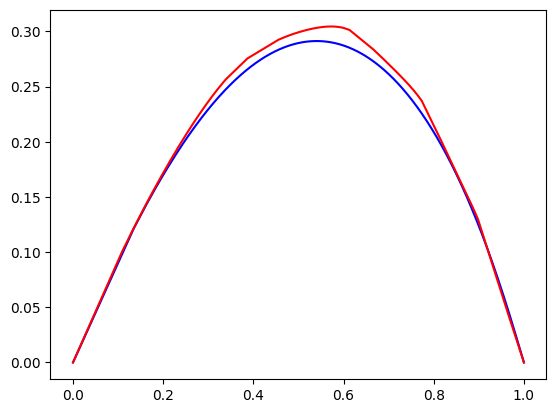

In [ ]:
D=3 #m=100  size=100   #para D mas chicas aumetar m
q=0.3
# Cotas
hc_max_curve = maximum_renyi_complexity_entropy(dx=D,m=100,q=q).T
hc_min_curve = minimum_renyi_complexity_entropy(dx=D, size=10000,q=q).T
hmin, cmin = hc_min_curve
hmax, cmax = hc_max_curve
plt.plot(hmin, cmin, linewidth=1.5, color='blue', zorder=0)
plt.plot(hmax, cmax, linewidth=1.5, color='red', zorder=0)

Creation of the systems to be compared

<ipython-input-13-1b7a6bfe71ad>:142: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(henon_map_averaged_RE, henon_map_averaged_RC, 'o', marker='D', markersize=10, color='tab:purple', label='Hénon Map')
<ipython-input-13-1b7a6bfe71ad>:144: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o--" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(k_noise_E, k_noise_C, 'o--', marker='.',  markersize=13,color='tab:cyan', label='K-noise')
<ipython-input-13-1b7a6bfe71ad>:145: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(schus_E, schus_C, 'o', marker='^', markersize=11, color='deeppink', label='Schuster Map')
<ipython-input-13-1b7a6bfe71ad>:146: UserWarning: marker is redundantly defined

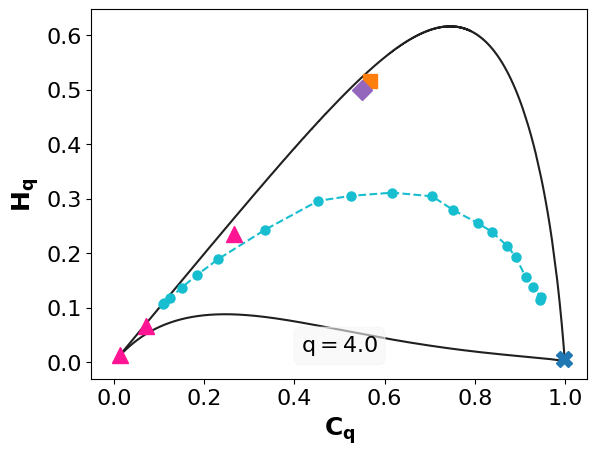

In [ ]:
# Renyi parameter
q=4.0
D=6
# Cotas
hc_max_curve = maximum_renyi_complexity_entropy(dx=D,m=500,q=q).T
hc_min_curve = minimum_renyi_complexity_entropy(dx=D, size=719,q=q).T
hmin, cmin = hc_min_curve
hmax, cmax = hc_max_curve


# Parámetros del mapa logístico
r = 4
# Inicialización
x = np.zeros(100000)
x[0] = 0.1

# Generación de la serie utilizando el mapa logístico
for t in range(1, len(x)):
    x[t] = r * x[t-1] * (1 - x[t-1])

# Calcula mapa_RE (asegúrate de tener definida la función Renyi_entropy_norm)
mapa_RE,mapa_RC =  renyi_complexity_entropy(x,q,D, 1)

# Function to generate white noise series
def generate_white_noise(length):
    return np.random.randn(length)

# Function to generate regular oscillations
def generate_regular_oscillations(length, frequency, amplitude):
    t = np.linspace(0, 1, length)
    return amplitude * np.sin(2 * np.pi * frequency * t)

# Function to generate Henon map series and average its components
def generate_henon_map_averaged(length, a, b):
    x = np.zeros(length)
    y = np.zeros(length)

    for t in range(1, length):
        x[t] = 1 - a * x[t - 1] ** 2 + y[t - 1]
        y[t] = b * x[t - 1]

    # Average the two components to create a single time series
    averaged_series = (x + y) / 2.0

    return averaged_series

# Número de filas en la matriz
num_filas = 20
alpha_max = 5
paso = alpha_max / num_filas
num_valores = int(alpha_max / paso) + 1  # Número de valores en el vector

# Longitud de cada serie temporal
longitud = 10000

# Rango de valores de alpha
#alpha_range = np.arange(0, alpha_max + paso, paso)

# Opción 1: Distribución logarítmica
alpha_range = np.logspace(0, np.log10(alpha_max), num_valores)

# Matriz para almacenar las series temporales
matriz = np.zeros((num_filas, longitud))
entropy = np.zeros(num_filas)
complexity = np.zeros(num_filas)

k_noise_E = np.zeros(num_filas)
k_noise_C = np.zeros(num_filas)
# Iterar a través de cada fila y generar una serie temporal
for i in range(num_filas):
    # Seleccionar un valor aleatorio de alpha en el rango especificado
    alpha = alpha_range[i]

    # Generar una serie temporal de ruido de color 1/|f|^(alpha)
    serie_temporal = np.real(ifft(fft(np.random.randn(longitud)) * (1 / np.arange(1, longitud + 1) ** (alpha / 2))))

    # Agregar la serie temporal a la matriz
    matriz[i, :] = serie_temporal
    e,c=renyi_complexity_entropy(serie_temporal, q, D, 1)
    k_noise_E[i] = e
    k_noise_C[i] = c


def schuster_map(x0, z, num_steps):
    """
    Calcula una serie temporal usando el mapa de Schuster.

    Args:
        x0 (float): Valor inicial de x.
        z (float): Parámetro z (debe ser 2, 2.5 o 3).
        num_steps (int): Número de pasos de tiempo para generar la serie temporal.

    Returns:
        List[float]: Lista de valores de la serie temporal generada.
    """
    x_values = []
    x = x0

    for _ in range(num_steps):
        x = (x + x ** z) % 1
        x_values.append(x)

    return x_values

# Generate schuster series
x0 = 0.1  # Valor inicial de x
z_values = [3/2,2,5/2]  # Valores de z
indice=0
schus_E = np.zeros(3)  # Inicializa un ndarray con tres elementos para almacenar valores de e
schus_C = np.zeros(3)  # Inicializa un ndarray con tres elementos para almacenar valores de c

for i in [0,1,2]:
    #print(i)
    serie_temporal = schuster_map(x0, z_values[i], longitud)
    e,c=renyi_complexity_entropy(serie_temporal, q, D, 1)
    schus_E[i] = e
    schus_C[i] = c

# Generate white noise series
white_noise = generate_white_noise(100000)

# Generate regular oscillations
oscillations = generate_regular_oscillations(100000, frequency=2, amplitude=0.5)

# Generate Henon map series and average its components
henon_map_averaged = generate_henon_map_averaged(100000, a=1.4, b=0.3)

# Calculate Renyi Complexity and Entropy for the new series
white_noise_RE, white_noise_RC = renyi_complexity_entropy(white_noise, q, D, 1)
oscillations_RE, oscillations_RC = renyi_complexity_entropy(oscillations, q, D, 1)
henon_map_averaged_RE, henon_map_averaged_RC = renyi_complexity_entropy(henon_map_averaged, q, D, 1)

##############################################################
# Plot the Renyi Complexity-Entropy diagrams for each series
##############################################################
# Las curvas de hmin y cmin se grafican sin líneas punteadas
plt.plot(mapa_RE, mapa_RC, marker='s', markersize=10, color='tab:orange', label='Logistic Map')

# Utiliza líneas punteadas para conectar los puntos de las otras curvas

#plt.plot(oscillations_RE, oscillations_RC, '--o', marker='s', markersize=5, markerfacecolor='b', color='b', label='Regular Oscillations')
plt.plot(henon_map_averaged_RE, henon_map_averaged_RC, 'o', marker='D', markersize=10, color='tab:purple', label='Hénon Map')

plt.plot(k_noise_E, k_noise_C, 'o--', marker='.',  markersize=13,color='tab:cyan', label='K-noise')
plt.plot(schus_E, schus_C, 'o', marker='^', markersize=11, color='deeppink', label='Schuster Map')
plt.plot(white_noise_RE, white_noise_RC, 'o', marker='X', markersize=11, color='tab:blue', label='White Noise')
plt.plot(hmin, cmin, linewidth=1.5, color='#202020', zorder=0)#, label='$C_{min}$')
plt.plot(hmax, cmax, linewidth=1.5, color='#202020', zorder=0)#, label='$C_{max}$')


# Mueve la leyenda a la esquina superior izquierda sin borde
#plt.legend(loc='upper left', frameon=False, fontsize=12)
# Mueve la leyenda a la esquina superior izquierda sin borde
#plt.legend(loc='upper left', bbox_to_anchor=(-0.01, 1.02), frameon=False, fontsize=12.5)

# Agrega el cartelito en el centro inferior
# Agrega el cartelito en el centro inferior
# Agrega un recuadro con texto
# Crear la cadena de texto con formato
text = f'q$={q}$'#  and  $D={D}$'
# Crear el gráfico
plt.text(0.5, 0.03, text, fontsize=16, ha='center', va='center',
         bbox=dict(boxstyle='round', facecolor='whitesmoke', edgecolor='whitesmoke', alpha=0.6))
#plt.text(0.55, 0.17, 'Stochastic\nBehavior', fontsize=10, ha='center', va='center', color='dimgray')
#plt.text(0.66, 0.46, 'Chaotic\nBehavior', fontsize=10, ha='center', va='center', color='dimgray')
#plt.text(0.04, 0.15, 'Regular\nOscillations', fontsize=10, ha='center', va='center', color='dimgray')

# Add an arrow pointing downward and to the right
#plt.annotate('', xy=(0.08, 0.09), xytext=(0.04, 0.12), fontsize=10, color='gray',
#             arrowprops=dict(arrowstyle='->', color='gray'))

# Configura Matplotlib para que las etiquetas math no estén en cursiva
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

# Configure labels y título con letras en negrita (bold)
#plt.xlabel('$C_q$', fontsize=18, fontweight='bold')
#plt.ylabel('$H_q$', fontsize=18, fontweight='bold')\
plt.xlabel(r'$\mathbf{C_q}$', fontsize=18)
plt.ylabel(r'$\mathbf{H_q}$', fontsize=18)

# Aumenta el tamaño de las etiquetas de los ejes (tick labels)
plt.xticks(fontsize=16)  # Cambia el tamaño de las etiquetas del eje X
plt.yticks(fontsize=16)  # Cambia el tamaño de las etiquetas del eje Y


# Crear la cadena de texto con formato para el nombre del archivo
filename = f'/content/renyi_q{q}_D{D}.svg'

# Guardar el gráfico con el nombre de archivo actualizado
plt.savefig(filename, format='svg', dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()


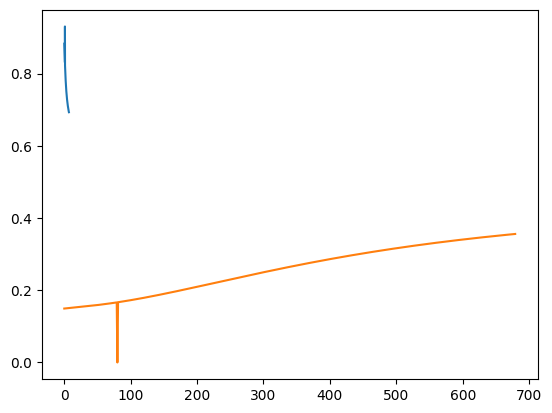

In [ ]:
# Renyi parameter
q_values = np.arange(0.2, 7.0, 0.01)
D=3
# Cotas

# Parámetros del mapa logístico
r = 4
# Inicialización
x = np.zeros(100000)
x[0] = 0.1

# Generación de la serie utilizando el mapa logístico
for t in range(1, len(x)):
    x[t] = r * x[t-1] * (1 - x[t-1])


# Function to generate white noise series
def generate_white_noise(length):
    return np.random.randn(length)


# Número de filas en la matriz
#num_filas = 15
#alpha_max = 5
#paso = alpha_max / num_filas

# Longitud de cada serie temporal
#longitud = 10000

# Rango de valores de alpha
#alpha_range = np.arange(0, alpha_max + paso, paso)
# Número de filas en la matriz
num_filas = 20
alpha_max = 5
paso = alpha_max / num_filas
num_valores = int(alpha_max / paso) + 1  # Número de valores en el vector

# Longitud de cada serie temporal
longitud = 10000

# Rango de valores de alpha
#alpha_range = np.arange(0, alpha_max + paso, paso)

# Opción 1: Distribución logarítmica
alpha_range = np.logspace(0, np.log10(alpha_max), num_valores)



# Matriz para almacenar las series temporales
matriz_knoise = np.zeros((num_filas, longitud))
entropy = np.zeros(num_filas)
complexity = np.zeros(num_filas)


# Iterar a través de cada fila y generar una serie temporal
for i in range(num_filas):
    # Seleccionar un valor aleatorio de alpha en el rango especificado
    alpha = alpha_range[i]

    # Generar una serie temporal de ruido de color 1/|f|^(alpha)
    serie_knoise = np.real(ifft(fft(np.random.randn(longitud)) * (1 / np.arange(1, longitud + 1) ** (alpha))))

    # Agregar la serie temporal a la matriz
    matriz_knoise[i, :] = serie_knoise


def schuster_map(x0, z, num_steps):
    """
    Calcula una serie temporal usando el mapa de Schuster.

    Args:
        x0 (float): Valor inicial de x.
        z (float): Parámetro z (debe ser 2, 2.5 o 3).
        num_steps (int): Número de pasos de tiempo para generar la serie temporal.

    Returns:
        List[float]: Lista de valores de la serie temporal generada.
    """
    x_values = []
    x = x0

    for _ in range(num_steps):
        x = (x + x ** z) % 1
        x_values.append(x)

    return x_values

# Generate schuster series
x0 = 0.1  # Valor inicial de x
z_values = [3/2,2,5/2]  # Valores de z

# Generate white noise series
white_noise = generate_white_noise(100000)



# Generate Henon map series and average its components
henon_map_averaged = generate_henon_map_averaged(100000, a=1.4, b=0.3)



###############################################
##############################################
# Calculate Renyi Complexity and Entropy for the new series
###############################################
schus_RE = np.zeros((3,len(q_values)))  # Inicializa un ndarray con tres elementos para almacenar valores de e
schus_RC = np.zeros((3,len(q_values)))  # Inicializa un ndarray con tres elementos para almacenar valores de c
mapa_RE = np.zeros(len(q_values))
mapa_RC = np.zeros(len(q_values))
white_noise_RE= np.zeros(len(q_values))
white_noise_RC= np.zeros(len(q_values))
henon_map_averaged_RE= np.zeros(len(q_values))
henon_map_averaged_RC= np.zeros(len(q_values))
k_noise_RE = np.zeros((num_filas,len(q_values)))
k_noise_RC = np.zeros((num_filas,len(q_values)))

for i in [0,1,2]:
    serie_schus = schuster_map(x0, z_values[i], longitud)
    indice=0
    for q in q_values:
        e , c = renyi_complexity_entropy(serie_schus, q, D, 1)
        schus_RE[i,indice] = e
        schus_RC[i,indice] = c
        indice=indice+1

indice=0
for q in q_values:
    mapa_RE[indice],mapa_RC[indice] =  renyi_complexity_entropy(x,q,D, 1)
    white_noise_RE[indice], white_noise_RC[indice] = renyi_complexity_entropy(white_noise, q, D, 1)
    henon_map_averaged_RE[indice], henon_map_averaged_RC[indice] = renyi_complexity_entropy(henon_map_averaged, q, D, 1)
    indice=indice+1



for i in  range(num_filas):
    serie_k=matriz_knoise[i, :]
    indice=0
    for q in q_values:
        e,c =renyi_complexity_entropy(serie_k, q, D, 1)
        k_noise_RE[i,indice] = e
        k_noise_RC[i,indice] = c
        indice=indice+1


plt.plot(q_values, mapa_RE, mapa_RC, label='Mapa Logístico')



<ipython-input-15-4c4cf92c0a39>:33: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
<ipython-input-15-4c4cf92c0a39>:34: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
<ipython-input-15-4c4cf92c0a39>:35: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))


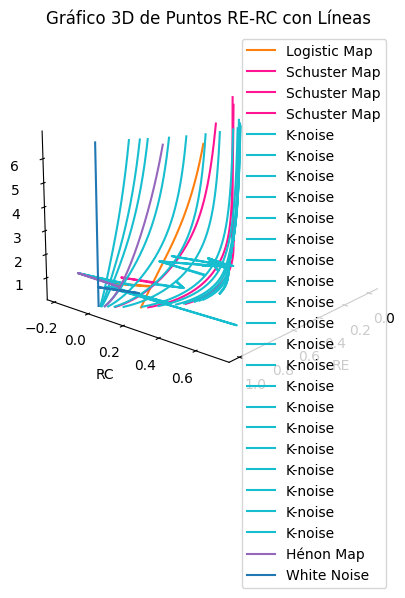

In [ ]:
# Crea una figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Trama los puntos RE-RC en función de q_values
#ax.scatter(mapa_RE, mapa_RC, q_values, c='b', marker='.', label='Puntos RE-RC')

# Conecta los puntos con líneas
ax.plot(mapa_RE, mapa_RC, q_values, color='tab:orange', label='Logistic Map')
for i in [0,1,2]:
    ax.plot(schus_RE[i], schus_RC[i], q_values,color='deeppink', label='Schuster Map')

for i in range(num_filas):
    ax.plot(k_noise_RE[i], k_noise_RC[i], q_values, color='tab:cyan', label='K-noise')

ax.plot(henon_map_averaged_RE, henon_map_averaged_RC, q_values,color='tab:purple', label='Hénon Map')
ax.plot(white_noise_RE, white_noise_RC, q_values, color='tab:blue', label='White Noise')


# Personaliza el gráfico
ax.set_xlabel('RE')
ax.set_ylabel('RC')
ax.set_zlabel('q_values')
ax.set_title('Gráfico 3D de Puntos RE-RC con Líneas')

# Elimina las líneas accesorias
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.grid(False)

# Cambia el color de fondo a blanco
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))


# Habilita los ejes faltantes
ax.box_on = True  # Muestra el "cuadro" que representa los ejes

ax.view_init(elev=20, azim=40)  # Ajusta los ángulos de elevación y azimutal para rotar el gráfico

# Muestra el gráfico
plt.legend()
plt.show()

<ipython-input-16-2ce82f9b7493>:39: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
<ipython-input-16-2ce82f9b7493>:40: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
<ipython-input-16-2ce82f9b7493>:41: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))


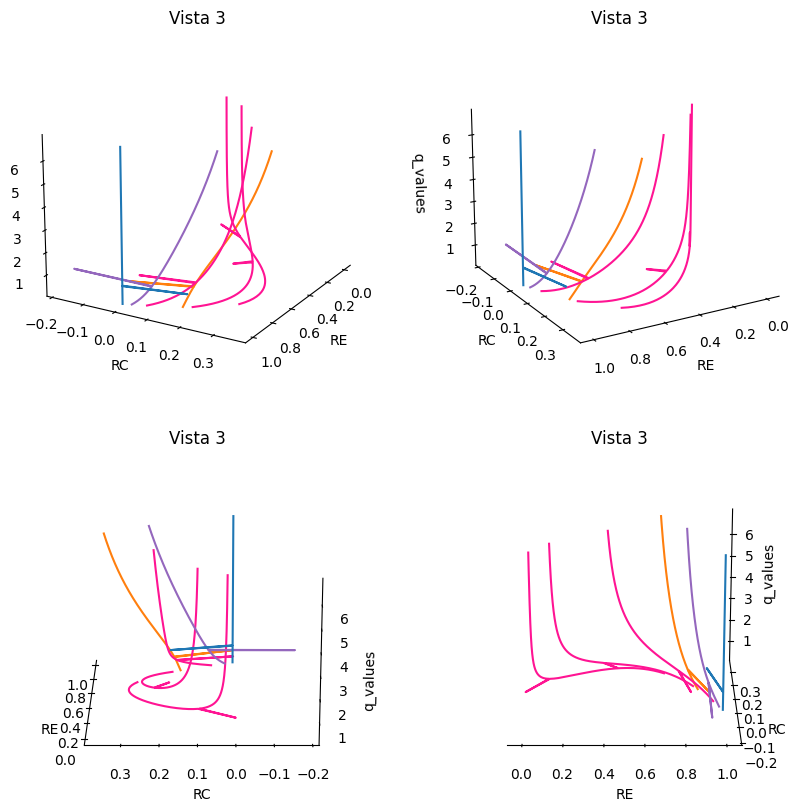

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Crear una lista de etiquetas para la leyenda basada en alpha_range
legend_labels = [f'Alpha = {alpha}' for alpha in alpha_range]
# Crear una figura con un subplot 1x3
fig = plt.figure(figsize=(10, 10))

# Ángulos de vista deseados
azimuths = [30, 60, 180,270]  # Cambia estos ángulos según tus necesidades

for i, azim in enumerate(azimuths):
    ax = fig.add_subplot(2, 2, i + 1, projection='3d')

    # Conecta los puntos con líneas
    ax.plot(mapa_RE, mapa_RC, q_values, color='tab:orange', label='Logistic Map')
    for i in [0,1,2]:
        ax.plot(schus_RE[i], schus_RC[i], q_values,color='deeppink', label='Schuster Map')

    #for i in range(num_filas):
        #ax.plot(k_noise_RE[i], k_noise_RC[i], q_values, color='tab:cyan', label='K-noise')

    ax.plot(henon_map_averaged_RE, henon_map_averaged_RC, q_values,color='tab:purple', label='Hénon Map')
    ax.plot(white_noise_RE, white_noise_RC, q_values, color='tab:blue', label='White Noise')


    # Personaliza el gráfico
    ax.set_xlabel('RE')
    ax.set_ylabel('RC')
    ax.set_zlabel('q_values')
    ax.set_title('Gráfico 3D de Puntos RE-RC con Líneas')

    # Elimina las líneas accesorias
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.grid(False)

    # Cambia el color de fondo a blanco
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))


    # Habilita los ejes faltantes
    ax.box_on = True  # Muestra el "cuadro" que representa los ejes

    ax.view_init(elev=20, azim=40)  # Ajusta los ángulos de elevación y azimutal para rotar el gráfico

    # Muestra el gráfico
    #plt.legend()

    ax.set_title(f'Vista {i + 1}')
    ax.view_init(elev=20, azim=azim)
plt.show(legend_labels)

<ipython-input-17-fd2b57f8a406>:36: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
<ipython-input-17-fd2b57f8a406>:37: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
<ipython-input-17-fd2b57f8a406>:38: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))


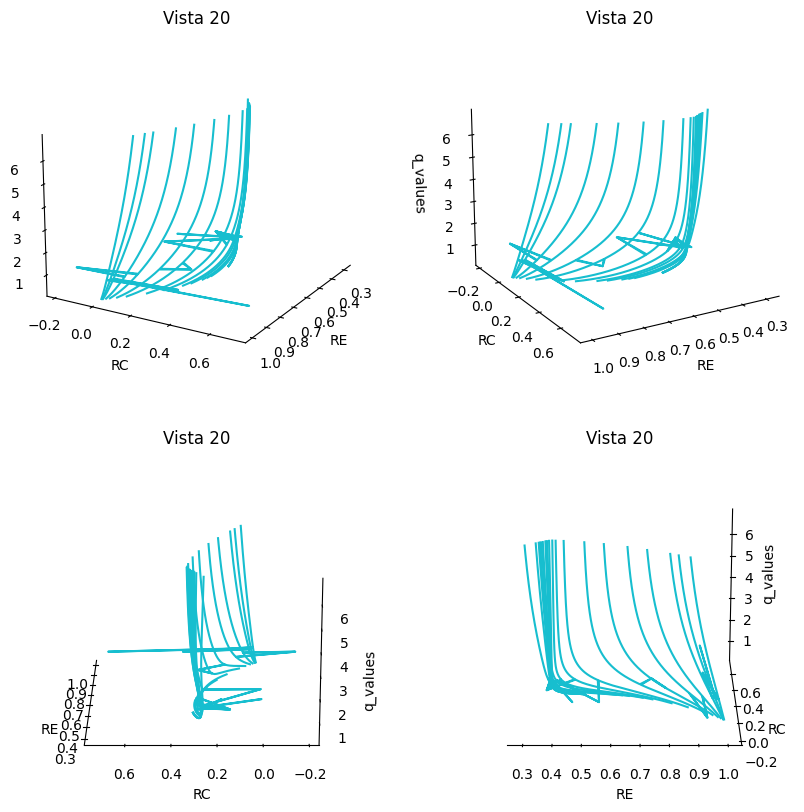

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
# Crear una figura con un subplot 1x3
fig = plt.figure(figsize=(10, 10))

# Ángulos de vista deseados
azimuths = [30, 60, 180,270]  # Cambia estos ángulos según tus necesidades

for i, azim in enumerate(azimuths):
    ax = fig.add_subplot(2, 2, i + 1, projection='3d')

    # Conecta los puntos con líneas
    #ax.plot(mapa_RE, mapa_RC, q_values, color='tab:orange', label='Logistic Map')
    #for i in [0,1,2]:
    #    ax.plot(schus_RE[i], schus_RC[i], q_values,color='deeppink', label='Schuster Map')

    for i in range(num_filas):
        ax.plot(k_noise_RE[i], k_noise_RC[i], q_values, color='tab:cyan', label='K-noise')

    #ax.plot(henon_map_averaged_RE, henon_map_averaged_RC, q_values,color='tab:purple', label='Hénon Map')
    #ax.plot(white_noise_RE, white_noise_RC, q_values, color='tab:blue', label='White Noise')


    # Personaliza el gráfico
    ax.set_xlabel('RE')
    ax.set_ylabel('RC')
    ax.set_zlabel('q_values')
    ax.set_title('Gráfico 3D de Puntos RE-RC con Líneas')

    # Elimina las líneas accesorias
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.grid(False)

    # Cambia el color de fondo a blanco
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))


    # Habilita los ejes faltantes
    ax.box_on = True  # Muestra el "cuadro" que representa los ejes

    ax.view_init(elev=20, azim=40)  # Ajusta los ángulos de elevación y azimutal para rotar el gráfico

    # Muestra el gráfico
    #plt.legend()

    ax.set_title(f'Vista {i + 1}')
    ax.view_init(elev=20, azim=azim)
plt.show()

In [ ]:
import scipy.io as sio

# Renyi parameter
q_values = np.arange(0.2, 7.0, 0.01)
D=4
# Longitud de cada serie temporal
#longitud = 10000

# Rango de valores de alpha
#alpha_range = np.arange(0, alpha_max + paso, paso)
# Número de filas en la matriz
num_filas = 20
alpha_max = 5
paso = alpha_max / num_filas
num_valores = int(alpha_max / paso) + 1  # Número de valores en el vector

# Longitud de cada serie temporal
longitud = 10000

# Rango de valores de alpha
#alpha_range = np.arange(0, alpha_max + paso, paso)

# Opción 1: Distribución logarítmica
alpha_range = np.logspace(0, np.log10(alpha_max), num_valores)



# Matriz para almacenar las series temporales
matriz_knoise = np.zeros((num_filas, longitud))
entropy = np.zeros(num_filas)
complexity = np.zeros(num_filas)


# Iterar a través de cada fila y generar una serie temporal
for i in range(num_filas):
    # Seleccionar un valor aleatorio de alpha en el rango especificado
    alpha = alpha_range[i]

    # Generar una serie temporal de ruido de color 1/|f|^(alpha)
    serie_knoise = np.real(ifft(fft(np.random.randn(longitud)) * (1 / np.arange(1, longitud + 1) ** (alpha))))

    # Agregar la serie temporal a la matriz
    matriz_knoise[i, :] = serie_knoise

# Suponiendo que tienes las variables k_noise_RE, k_noise_RC y q_values en tu código Python


k_noise_RE = np.zeros((num_filas,len(q_values)))
k_noise_RC = np.zeros((num_filas,len(q_values)))
for i in  range(num_filas):
    serie_k=matriz_knoise[i, :]
    indice=0
    for q in q_values:
        e,c =renyi_complexity_entropy(serie_k, q, D, 1)
        k_noise_RE[i,indice] = e
        k_noise_RC[i,indice] = c
        indice=indice+1



In [ ]:
D=3
k_noise_RE = np.zeros((num_filas,len(q_values)))
k_noise_RC = np.zeros((num_filas,len(q_values)))
for i in  range(num_filas):
    serie_k=matriz_knoise[i, :]
    indice=0
    for q in q_values:
        e,c =renyi_complexity_entropy(serie_k, q, D, 1)
        k_noise_RE[i,indice] = e
        k_noise_RC[i,indice] = c
        indice=indice+1

In [ ]:
# Especifica el nombre del archivo MATLAB .mat en el que deseas guardar las variables
matlab_filename = 'variablesD3.mat'
# Crear un diccionario con las variables que deseas exportar
matlab_variables = {
    'k_noise_RE': k_noise_RE,
    'k_noise_RC': k_noise_RC,
    'q_values': q_values
}
# Guardar las variables en el archivo .mat
sio.savemat(matlab_filename, matlab_variables)

In [ ]:
print(alpha_range)